In [53]:
import pandas as pd
df_train_est_A = pd.read_csv('train_est_C.csv')
df_train_obs_A = pd.read_csv('train_obs_C.csv')
df_test_A = pd.read_csv('X_test_C.csv')
df_train_est_A = df_train_est_A.rename(columns={'Unnamed: 0': 'date_forecast'})

df_train_obs_A = df_train_obs_A.rename(columns={'Unnamed: 0': 'date_forecast'})

df_test_A = df_test_A.rename(columns={'Unnamed: 0': 'date_forecast'})

df_train_est_A.set_index('date_forecast', inplace=True)
df_train_obs_A.set_index('date_forecast', inplace=True)
df_test_A.set_index('date_forecast', inplace=True)
df_train_obs_A.index = pd.to_datetime(df_train_obs_A.index)
df_train_obs_A.index = pd.to_datetime(df_train_obs_A.index)

In [54]:
df = pd.concat([df_train_obs_A,df_train_est_A])
df = df.drop(columns = 'date_calc', axis = 1)
df_test_A = df_test_A.drop(columns = 'date_calc', axis = 1)


In [55]:
import re
df = df.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
df_test_A = df_test_A.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [56]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
# Imputa i valori mancanti
df_knn =pd.DataFrame(imputer.fit_transform(df),columns = df.columns, index = df.index)

In [57]:
columns = df.drop(columns = 'pv_measurement').columns
df = df_knn

In [58]:
from sklearn.preprocessing import RobustScaler
# Crea un oggetto MinMaaxScaler
scaler = RobustScaler()
# Normalizza il DataFrame
df_normalized = pd.DataFrame(scaler.fit_transform(df_knn[columns]),columns = df_knn[columns].columns, index = df_knn[columns].index)
df_normalized['pv_measurement'] = df['pv_measurement']

In [59]:
from sklearn.preprocessing import MinMaxScaler
# Crea un oggetto MinMaaxScaler
scaler = RobustScaler()
# Normalizza il DataFrame
df_test_A = pd.DataFrame(scaler.fit_transform(df_test_A),columns = df_test_A.columns, index = df_test_A.index)

In [60]:
df = df_normalized
df

,absolute_humidity_2mgm3,air_density_2mkgm3,ceiling_height_aglm,clear_sky_energy_1hJ,clear_sky_radW,cloud_base_aglm,dew_or_rimeidx,dew_point_2mK,diffuse_radW,diffuse_rad_1hJ,...,sun_elevationd,super_cooled_liquid_waterkgm2,t_1000hPaK,total_cloud_coverp,visibilitym,wind_speed_10mms,wind_speed_u_10mms,wind_speed_v_10mms,wind_speed_w_1000hPams,pv_measurement
date_forecast,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,0.053333,-0.295916,-0.282613,-0.014890,-0.008572,-0.078012,1.00,0.048469,-0.016239,-0.048912,...,-1.413471,0.00,-0.016760,-0.186483,-0.669192,0.170455,0.257812,0.676768,0.0,0.00
2019-01-01 01:00:00,0.020000,-0.311224,-0.303849,-0.014890,-0.008572,-0.117553,0.75,0.015306,-0.016239,-0.048912,...,-1.312473,0.00,-0.033520,0.131267,-0.772241,0.511364,0.351562,0.969697,0.0,0.00
2019-01-01 02:00:00,0.020000,-0.331632,-0.325412,-0.014890,-0.008572,-0.157702,0.00,0.015306,-0.016239,-0.048912,...,-1.162266,1.00,-0.039106,0.101576,-0.838056,0.647727,0.500000,1.020202,0.0,0.00
2019-01-01 03:00:00,0.006667,-0.311224,-0.339894,-0.014890,-0.008572,-0.184666,0.00,-0.002551,-0.016239,-0.048912,...,-0.981231,2.00,-0.097765,0.080219,-0.969792,0.943182,0.851562,0.989899,0.0,0.00
2019-01-01 04:00:00,0.093333,-0.346938,-0.342173,-0.014890,-0.008572,-0.188910,0.00,0.081632,-0.016239,-0.048912,...,-0.785166,2.00,-0.111732,0.087511,-1.025106,1.318182,1.445312,0.494949,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-30 19:00:00,-0.233333,0.413264,-0.173148,0.088802,0.010264,-0.439277,0.00,-0.252551,0.025680,0.181702,...,0.014662,0.00,-0.399441,0.103138,-0.397558,0.704545,1.031250,0.373737,0.0,50.96
2023-04-30 20:00:00,-0.233333,0.474491,-0.166519,-0.012166,-0.008572,-0.431241,0.00,-0.260204,-0.016239,-0.027928,...,-0.133699,0.00,-0.438547,0.064071,-0.430478,0.488636,0.828125,0.474747,0.0,2.94
2023-04-30 21:00:00,-0.233333,0.484693,-0.153127,-0.014890,-0.008572,-0.422128,0.00,-0.265306,-0.016239,-0.048912,...,-0.245818,0.25,-0.458101,0.065634,-0.460036,0.488636,0.726562,0.585859,0.0,0.00


In [61]:
df.index = pd.to_datetime(df.index)
df['hours'] = df.index.hour
df['month'] = df.index.month
df['hour_cos'] = np.cos(df['hours'] * (2. * np.pi / 24))
df['month_cos'] = np.cos(df['month'] * (2. * np.pi / 12))
df['hour_sin'] = np.sin(df['hours'] * (2. * np.pi / 24))
df['month_sin'] = np.sin(df['month'] * (2. * np.pi / 12))
df

,absolute_humidity_2mgm3,air_density_2mkgm3,ceiling_height_aglm,clear_sky_energy_1hJ,clear_sky_radW,cloud_base_aglm,dew_or_rimeidx,dew_point_2mK,diffuse_radW,diffuse_rad_1hJ,...,wind_speed_u_10mms,wind_speed_v_10mms,wind_speed_w_1000hPams,pv_measurement,hours,month,hour_cos,month_cos,hour_sin,month_sin
date_forecast,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,0.053333,-0.295916,-0.282613,-0.014890,-0.008572,-0.078012,1.00,0.048469,-0.016239,-0.048912,...,0.257812,0.676768,0.0,0.00,0,1,1.000000,0.866025,0.000000,0.500000
2019-01-01 01:00:00,0.020000,-0.311224,-0.303849,-0.014890,-0.008572,-0.117553,0.75,0.015306,-0.016239,-0.048912,...,0.351562,0.969697,0.0,0.00,1,1,0.965926,0.866025,0.258819,0.500000
2019-01-01 02:00:00,0.020000,-0.331632,-0.325412,-0.014890,-0.008572,-0.157702,0.00,0.015306,-0.016239,-0.048912,...,0.500000,1.020202,0.0,0.00,2,1,0.866025,0.866025,0.500000,0.500000
2019-01-01 03:00:00,0.006667,-0.311224,-0.339894,-0.014890,-0.008572,-0.184666,0.00,-0.002551,-0.016239,-0.048912,...,0.851562,0.989899,0.0,0.00,3,1,0.707107,0.866025,0.707107,0.500000
2019-01-01 04:00:00,0.093333,-0.346938,-0.342173,-0.014890,-0.008572,-0.188910,0.00,0.081632,-0.016239,-0.048912,...,1.445312,0.494949,0.0,0.00,4,1,0.500000,0.866025,0.866025,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-30 19:00:00,-0.233333,0.413264,-0.173148,0.088802,0.010264,-0.439277,0.00,-0.252551,0.025680,0.181702,...,1.031250,0.373737,0.0,50.96,19,4,0.258819,-0.500000,-0.965926,0.866025
2023-04-30 20:00:00,-0.233333,0.474491,-0.166519,-0.012166,-0.008572,-0.431241,0.00,-0.260204,-0.016239,-0.027928,...,0.828125,0.474747,0.0,2.94,20,4,0.500000,-0.500000,-0.866025,0.866025
2023-04-30 21:00:00,-0.233333,0.484693,-0.153127,-0.014890,-0.008572,-0.422128,0.00,-0.265306,-0.016239,-0.048912,...,0.726562,0.585859,0.0,0.00,21,4,0.707107,-0.500000,-0.707107,0.866025


In [62]:
df_test_A.index = pd.to_datetime(df_test_A.index)
df_test_A['hours'] = df_test_A.index.hour
df_test_A['month'] = df_test_A.index.month
df_test_A['hour_cos'] = np.cos(df_test_A['hours'] * (2. * np.pi / 24))
df_test_A['month_cos'] = np.cos(df_test_A['month'] * (2. * np.pi / 12))
df_test_A['hour_sin'] = np.sin(df_test_A['hours'] * (2. * np.pi / 24))
df_test_A['month_sin'] = np.sin(df_test_A['month'] * (2. * np.pi / 12))

In [63]:
import pandas as pd
import math

# Function to calculate solar zenith angle
def calculate_solar_zenith(row):
    t = row['hours']
    Az = row['sun_azimuthd']
    
    # Calculate the solar zenith angle (θ) using a simplified model
    solar_zenith_angle = 90 - abs(t - 12) * (90 / 6)  # Assumes the sun is highest at noon
    
    # Ensure the solar zenith angle is between 0 and 90 degrees
    solar_zenith_angle = max(0, min(90, solar_zenith_angle))
    
    return solar_zenith_angle

# Apply the function to each row in the DataFrame
df['Solar Zenith Angle (degrees)'] = df.apply(calculate_solar_zenith, axis=1)
df_test_A['Solar Zenith Angle (degrees)'] = df_test_A.apply(calculate_solar_zenith, axis=1)

In [64]:
def calculate_total_radiation(row):
    DNI = row['direct_radW']
    solar_zenith_angle = row['Solar Zenith Angle (degrees)']
    DHI = row['diffuse_radW']
    # Calculate total solar radiation (G) using the formula
    G = DNI * math.cos(math.radians(solar_zenith_angle)) + DHI
    
    return G

# Apply the function to each row in the DataFrame
df['Total Solar Radiation (W/m²)'] = df.apply(calculate_total_radiation, axis=1)
df_test_A['Total Solar Radiation (W/m²)'] = df_test_A.apply(calculate_total_radiation, axis=1)

In [65]:
feature =['hours',
 'Solar Zenith Angle (degrees)',
 'direct_rad_1hJ',
 'sun_elevationd',
 'sun_azimuthd',
 'hour_sin',
 'hour_cos',
 'direct_radW',
 'diffuse_rad_1hJ',
 'diffuse_radW',
 'clear_sky_radW',
 'clear_sky_energy_1hJ',
 'pv_measurement']

In [66]:
feature_test =['hours',
 'Solar Zenith Angle (degrees)',
 'direct_rad_1hJ',
 'sun_elevationd',
 'sun_azimuthd',
 'hour_sin',
 'hour_cos',
 'direct_radW',
 'diffuse_rad_1hJ',
 'diffuse_radW',
 'clear_sky_radW',
 'clear_sky_energy_1hJ']

In [67]:
target = 'pv_measurement'

In [212]:
import numpy as np
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

# Generate some example time series data
# Replace this with your own time series data
data = df

# Define the number of splits for time series cross-validation
n_splits = 5
tscv = TimeSeriesSplit(n_splits=n_splits)

# Initialize empty arrays to store meta features and true targets
meta_features = np.empty(data.shape[0])

# Iterate through time series cross-validation splits
for train_index, test_index in tscv.split(data):
    train_data = data.iloc[train_index]
    test_data = data.iloc[test_index]
    
    # Split the data into features and target
    X_train = train_data[feature_test]
    y_train = train_data['pv_measurement']
    X_test = test_data[feature_test]
    y_test = test_data['pv_measurement']
    lgbmpar = {'verbose' : -1 }
    lgbm_model = LGBMRegressor(**lgbmpar)
    lgbm_model.fit(X_train, y_train)
    catapar = {'verbose':500 ,'depth': 10, 'learning_rate': 0.011666559879564265, 'subsample': 0.824205356621038, 'colsample_bylevel': 0.1537898172244773, 'min_data_in_leaf': 41}
    # Initialize and train the CatBoost model
    catboost_model = CatBoostRegressor(**catapar)
    catboost_model.fit(X_train, y_train)
    
   # rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    #rf_model.fit(X_train, y_train)

    # Make predictions on the test data
    lgbm_preds = lgbm_model.predict(X_test)
    catboost_preds = catboost_model.predict(X_test)
   # rf_preds = rf_model.predict(X_test)
    mae_lgbm = mean_absolute_error(y_test, lgbm_preds)
    mae_cat = mean_absolute_error(y_test, catboost_preds)
   # mae_rf = mean_absolute_error(y_test, rf_preds)
    print(f'Lgb : {mae_lgbm}, cat: {mae_cat}, rf: {mae_rf}')
    # Stack the predictions horizontally to create meta features
    stacked_features = np.column_stack((lgbm_preds, catboost_preds))

0:	learn: 1092.6024514	total: 716us	remaining: 716ms
500:	learn: 432.8302039	total: 1.3s	remaining: 1.29s
999:	learn: 393.4580535	total: 2.84s	remaining: 0us
Lgb : 336.0902894861547, cat: 312.8115302796882, rf: 118.44509603873237
0:	learn: 1217.3394393	total: 1.15ms	remaining: 1.15s
500:	learn: 492.5987395	total: 1.64s	remaining: 1.63s
999:	learn: 470.1005106	total: 3.52s	remaining: 0us
Lgb : 154.69870709108912, cat: 158.33056685922003, rf: 118.44509603873237
0:	learn: 1133.9898592	total: 2.35ms	remaining: 2.35s
500:	learn: 457.2824668	total: 1.83s	remaining: 1.83s
999:	learn: 438.0421236	total: 3.93s	remaining: 0us
Lgb : 231.46499768373636, cat: 230.68942346765706, rf: 118.44509603873237
0:	learn: 1171.7540127	total: 1.69ms	remaining: 1.69s
500:	learn: 463.6565019	total: 1.91s	remaining: 1.9s
999:	learn: 447.6169812	total: 4.27s	remaining: 0us
Lgb : 262.19502014722786, cat: 263.99033452332174, rf: 118.44509603873237
0:	learn: 1193.6072584	total: 2.13ms	remaining: 2.13s
500:	learn: 474

In [213]:
df_stacked = pd.DataFrame({'lgbm': lgbm_preds, 'cat' :catboost_preds, 'y': y_test })
df_stacked.head(50)

,lgbm,cat,y
date_forecast,,,
2022-08-29 11:00:00,2312.595048,2539.465321,2153.58
2022-08-29 12:00:00,2968.520678,2831.154721,3186.26
2022-08-29 13:00:00,2227.779184,2325.002267,2137.08
2022-08-29 14:00:00,1519.094709,1708.916603,1160.72
2022-08-29 15:00:00,1275.261657,1209.982876,812.24
2022-08-29 16:00:00,547.677129,599.348708,347.82
2022-08-29 17:00:00,221.481128,209.920530,54.34
2022-08-29 18:00:00,-0.478374,22.282667,3.30
2022-08-29 19:00:00,1.133297,-3.496907,0.00


In [ ]:
subset_cols = ['cat','rf','lgbm']
df_stacked['media'] = df_stacked[subset_cols].mean(axis=1)
df_stacked.head(50)

In [ ]:
# Train the meta-model on the combined feature matrix and the target values
meta_model = LinearRegression()
meta_model.fit(stacked_features, y_test)
Linear_pred = meta_model.predict(stacked_features)

In [ ]:
df_stacked['Linear'] = Linear_pred
df_stacked[['y','media','Linear']].head(50)

In [ ]:
lgbm_preds = lgbm_model.predict(df_test_A[feature_test])
catboost_preds = catboost_model.predict(df_test_A[feature_test])
rf_preds = rf_model.predict(df_test_A[feature_test])

# Combine the predictions of the base models into a single feature matrix
X_new_meta = np.column_stack((lgbm_preds, catboost_preds,rf_preds))

# Make a prediction using the meta-model
y_new_pred = meta_model.predict(X_new_meta)

In [78]:
pred_df = pd.DataFrame({'Prediction':y_new_pred})

In [79]:
threshold = 0.05
pred_df['Prediction'] = pred_df['Prediction'].apply(lambda x: 0 if x < threshold else x)

<Axes: >

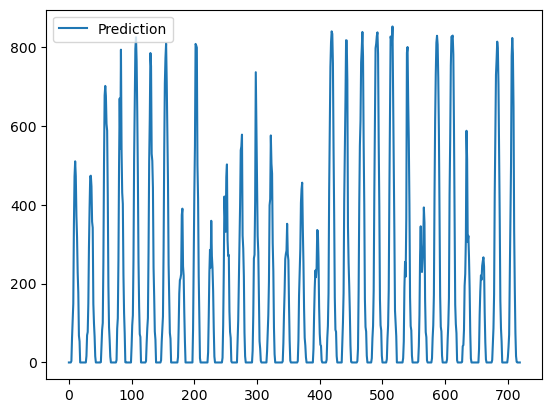

In [82]:
(pred_df*5).to_csv('C.csv')
(pred_df*5).plot()

In [ ]:
df['pv_measurement'].plot()

In [71]:
import numpy as np

# Definisci la soglia per riconoscere i picchi
soglia =450  # Modifica questa soglia in base ai tuoi dati
time_series_data = df['pv_measurement']
# Crea una lista vuota per la feature "picco"
picco = [0] * len(time_series_data)

# Scansiona la time series per individuare i picchi
for i in range(1, len(time_series_data) - 1):
    if time_series_data[i] > soglia:
        picco[i] = 1

df['picco'] = picco

# Visualizza il DataFrame con la nuova feature "picco"
print(df['picco'].head(50))


date_forecast
2019-01-01 00:00:00    0
2019-01-01 01:00:00    0
2019-01-01 02:00:00    0
2019-01-01 03:00:00    0
2019-01-01 04:00:00    0
2019-01-01 05:00:00    0
2019-01-01 06:00:00    0
2019-01-01 07:00:00    0
2019-01-01 08:00:00    0
2019-01-01 09:00:00    0
2019-01-01 10:00:00    0
2019-01-01 11:00:00    0
2019-01-01 12:00:00    0
2019-01-01 13:00:00    0
2019-01-01 14:00:00    0
2019-01-01 15:00:00    0
2019-01-01 16:00:00    0
2019-01-01 17:00:00    0
2019-01-01 18:00:00    0
2019-01-01 19:00:00    0
2019-01-01 20:00:00    0
2019-01-01 21:00:00    0
2019-01-01 22:00:00    0
2019-01-01 23:00:00    0
2019-01-02 00:00:00    0
2019-01-02 01:00:00    0
2019-01-02 02:00:00    0
2019-01-02 03:00:00    0
2019-01-02 04:00:00    0
2019-01-02 05:00:00    0
2019-01-02 06:00:00    0
2019-01-02 07:00:00    0
2019-01-02 08:00:00    0
2019-01-02 09:00:00    0
2019-01-02 10:00:00    0
2019-01-02 11:00:00    0
2019-01-02 12:00:00    0
2019-01-02 13:00:00    0
2019-01-02 14:00:00    0
2019-01-02 

In [69]:
df['pv_measurement'].quantile(0.95)

499.8

In [70]:
import numpy as np

# Definisci la soglia per riconoscere i picchi
soglia =0  # Modifica questa soglia in base ai tuoi dati
time_series_data = df['pv_measurement']
# Crea una lista vuota per la feature "picco"
picco = [0] * len(time_series_data)

# Scansiona la time series per individuare i picchi
for i in range(1, len(time_series_data) - 1):
    if time_series_data[i] == soglia:
        picco[i] = 1

df['zero'] = picco

# Visualizza il DataFrame con la nuova feature "picco"
print(df['zero'].head(50))

date_forecast
2019-01-01 00:00:00    0
2019-01-01 01:00:00    1
2019-01-01 02:00:00    1
2019-01-01 03:00:00    1
2019-01-01 04:00:00    1
2019-01-01 05:00:00    1
2019-01-01 06:00:00    1
2019-01-01 07:00:00    1
2019-01-01 08:00:00    1
2019-01-01 09:00:00    1
2019-01-01 10:00:00    0
2019-01-01 11:00:00    0
2019-01-01 12:00:00    0
2019-01-01 13:00:00    0
2019-01-01 14:00:00    1
2019-01-01 15:00:00    1
2019-01-01 16:00:00    0
2019-01-01 17:00:00    1
2019-01-01 18:00:00    1
2019-01-01 19:00:00    1
2019-01-01 20:00:00    1
2019-01-01 21:00:00    1
2019-01-01 22:00:00    1
2019-01-01 23:00:00    1
2019-01-02 00:00:00    1
2019-01-02 01:00:00    1
2019-01-02 02:00:00    1
2019-01-02 03:00:00    1
2019-01-02 04:00:00    1
2019-01-02 05:00:00    1
2019-01-02 06:00:00    1
2019-01-02 07:00:00    1
2019-01-02 08:00:00    1
2019-01-02 09:00:00    1
2019-01-02 10:00:00    0
2019-01-02 11:00:00    0
2019-01-02 12:00:00    0
2019-01-02 13:00:00    0
2019-01-02 14:00:00    1
2019-01-02 

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Crea un sottoinsieme del DataFrame con le osservazioni relative ai picchi
df_picchi = df[df['picco'] == 1]
n_splits = 5
tscv = TimeSeriesSplit(n_splits=n_splits)
for train_index, test_index in tscv.split(df_picchi):
    train_data = df_picchi.iloc[train_index]
    test_data = df_picchi.iloc[test_index]
    # Split the data into features and target
    X_train = train_data[feature_test]
    y_train = train_data['pv_measurement']
    X_test = test_data[feature_test]
    y_test = test_data['pv_measurement']
    rf_picchi = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_picchi.fit(X_train, y_train)
    y_picchi = rf_picchi.predict(X_test)
    mae_picchi = mean_absolute_error(y_test, y_picchi)
    print(f"MAE dei picchi model: {mae_picchi}")


MAE dei picchi model: 57.202671489361684
MAE dei picchi model: 85.71969446808514
MAE dei picchi model: 71.16881531914893
MAE dei picchi model: 80.26396
MAE dei picchi model: 53.61901106382979


In [73]:
# Crea un sottoinsieme del DataFrame con le osservazioni senza picchi
df_serie_generale = df[df['picco'] == 0]
n_splits = 5
tscv = TimeSeriesSplit(n_splits=n_splits)
for train_index, test_index in tscv.split(df_serie_generale):
    train_data = df_serie_generale.iloc[train_index]
    test_data = df_serie_generale.iloc[test_index]
    # Split the data into features and target
    X_train = train_data[feature_test]
    y_train = train_data['pv_measurement']
    X_test = test_data[feature_test]
    y_test = test_data['pv_measurement']
    rf_serie = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_serie.fit(X_train, y_train)
    y_serie = rf_picchi.predict(X_test)
    mae_serie = mean_absolute_error(y_test, y_serie)
    print(f"MAE dei serie model: {mae_serie}")

MAE dei serie model: 448.45066295029824
MAE dei serie model: 405.396893025845
MAE dei serie model: 440.7905921192843
MAE dei serie model: 437.1933016381711
MAE dei serie model: 443.41741957852895


In [74]:
from sklearn.ensemble import VotingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
data = df
n_splits = 2
tscv = TimeSeriesSplit(n_splits=n_splits)
for train_index, test_index in tscv.split(data):
    train_data = data.iloc[train_index]
    test_data = data.iloc[test_index]
    # Split the data into features and target
    X_train = train_data[feature_test]
    y_train = train_data['pv_measurement']
    X_test = test_data[feature_test]
    y_test = test_data['pv_measurement']

    # Genera previsioni dai due modelli
    previsioni_picchi = rf_picchi.predict(X_test)
    previsioni_serie_generale = rf_serie.predict(X_test)
    
    # Combina le previsioni in un ensemble model
    ensemble_model = VotingRegressor(estimators=[('modello_picchi', rf_picchi), ('modello_serie_generale', rf_serie)])

    # Addestra l'ensemble model sulle previsioni dei modelli base
    ensemble_model.fit(X_train, y_train)

    # Calcola le previsioni dell'ensemble model
    previsioni_ensemble = ensemble_model.predict(X_test)

    # Valuta le previsioni dell'ensemble model


    mse_ensemble = mean_absolute_error(y_test, previsioni_ensemble)
    print(f"MSE dell'ensemble model: {mse_ensemble}")


MSE dell'ensemble model: 34.966957143745724
MSE dell'ensemble model: 23.81075552155253


In [75]:
df_prova = pd.DataFrame({'true':y_test,'pred':previsioni_ensemble})


<Axes: xlabel='date_forecast'>

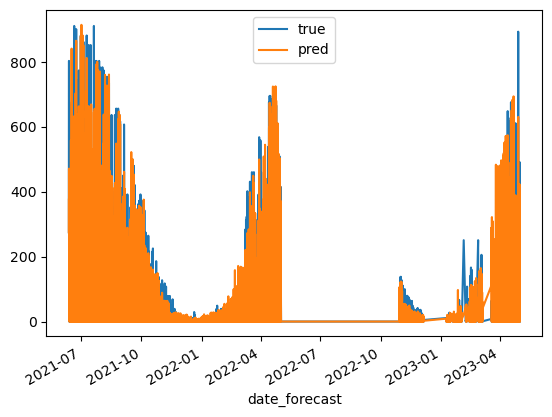

In [76]:
df_prova.plot()

In [77]:
y_new_pred = pd.DataFrame(ensemble_model.predict(df_test_A[feature_test]))

<Axes: >

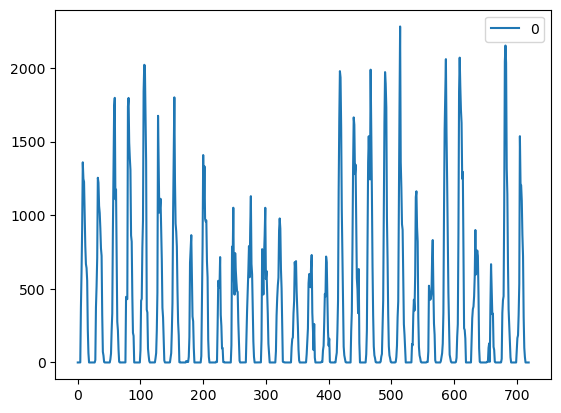

In [228]:
(pred).plot()